
## Use of Machine Learning to Generate and Classify Fractal Shapes

#### Muhannad Alabdullateef
#### Hilderbrand Department of Petroleum and Geosystems Engineering, Cockrell School of Engineering
##### [Twitter](https://twitter.com/mhnd_95) | [GitHub](https://github.com/Mhnd95) | [GoogleScholar](https://scholar.google.com/citations?user=69cHE_wAAAAJ&hl=en&authuser=2) | [LinkedIn](https://www.linkedin.com/in/muhannad-alabdullateef/)

### Subsurface Machine Learning Course, The University of Texas at Austin
#### Hildebrand Department of Petroleum and Geosystems Engineering, Cockrell School of Engineering
#### Department of Geological Sciences, Jackson School of Geosciences




_____________________

Workflow supervision and review by:

#### Instructor: Prof. Michael Pyrcz, Ph.D., P.Eng., Associate Professor, The Univeristy of Texas at Austin
##### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

#### Course TA: Misael Morales, Graduate Student, The University of Texas at Austin
##### [LinkedIn](https://www.linkedin.com/in/misaelmmorales/)


### Executive Summary

Fractal shapes are one of the most fascinating things that can be seen with the human eye, but can machines see them? The purpose of this project is to generate, train and classify 3 classes of fractal shapes from randomly generated pictures and then classify them from an existing class list. After running the code, it is apparent that a larger training pool is required and a more robust code is recommended. 


### Import Packages

In [1]:
import os                                                           # To work with create and modify folders
import numpy as np                                                  # To work with data and arrays
import matplotlib.pyplot as plt                                     # To generate the random shapes
import cv2
import tensorflow as tf                                             # To be be able to analyze the generated pictures
from tensorflow.keras.models import Sequential                      # To build the model
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from tensorflow.keras import layers
from tensorflow.keras.metrics import Recall, Precision, BinaryAccuracy         # To be able to evaluate the model

In [2]:
batch_size = 32
img_height = 256
img_width = 256

In [3]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  'data',
  validation_split=0.2,
  subset="training",
  seed=579,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 840 files belonging to 3 classes.
Using 672 files for training.


In [4]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  'data',
  validation_split=0.2,
  subset="validation",
  seed=579,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 840 files belonging to 3 classes.
Using 168 files for validation.


In [5]:
class_names = train_ds.class_names
print(class_names)

['julia_set', 'koch_snowflake_set', 'mandelbrot_set']


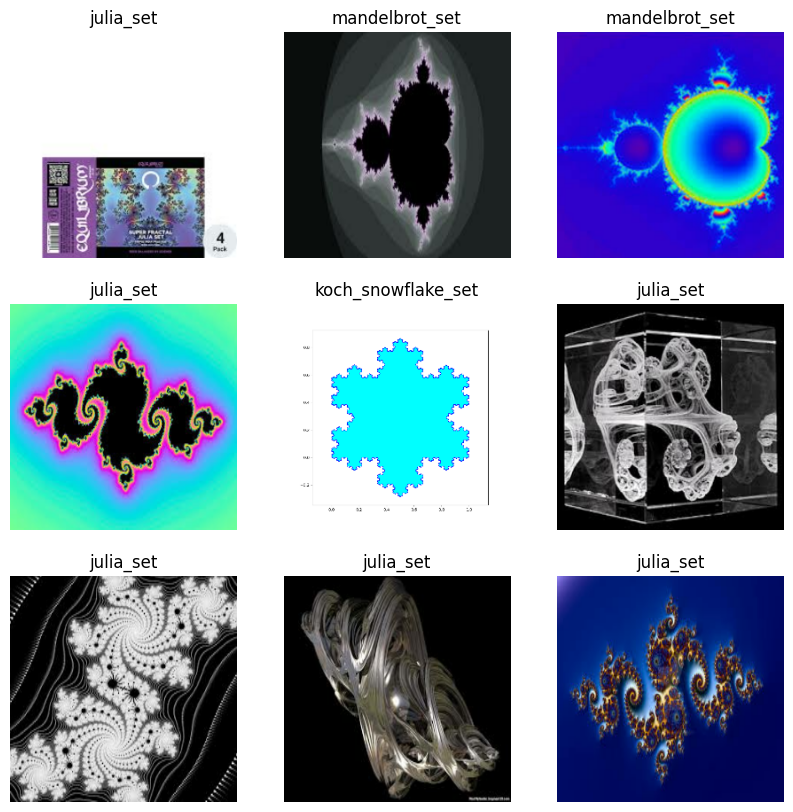

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [8]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 256, 256, 3)
(32,)


In [9]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [10]:
normalization_layer = layers.Rescaling(1./255)


In [11]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [12]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [13]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [14]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 128, 128, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 64, 64, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        1

In [15]:
epochs=50
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/50


21/21 [==============================] - 4s 167ms/step - loss: 1.6413 - accuracy: 0.4137 - val_loss: 0.6392 - val_accuracy: 0.6369
Epoch 2/50
21/21 [==============================] - 3s 157ms/step - loss: 0.5723 - accuracy: 0.6682 - val_loss: 0.6172 - val_accuracy: 0.7321
Epoch 3/50
21/21 [==============================] - 3s 157ms/step - loss: 0.4555 - accuracy: 0.7827 - val_loss: 0.6596 - val_accuracy: 0.6667
Epoch 4/50
21/21 [==============================] - 3s 154ms/step - loss: 0.3517 - accuracy: 0.8601 - val_loss: 0.8286 - val_accuracy: 0.6548
Epoch 5/50
21/21 [==============================] - 3s 154ms/step - loss: 0.2789 - accuracy: 0.8943 - val_loss: 0.8725 - val_accuracy: 0.6250
Epoch 6/50
21/21 [==============================] - 3s 155ms/step - loss: 0.2175 - accuracy: 0.9256 - val_loss: 0.9215 - val_accuracy: 0.6667
Epoch 7/50
21/21 [==============================] - 3s 154ms/step - loss: 0.1970 - accuracy: 0.9286 - val_loss: 1.0526 - val_accuracy: 0.6548
Epoc

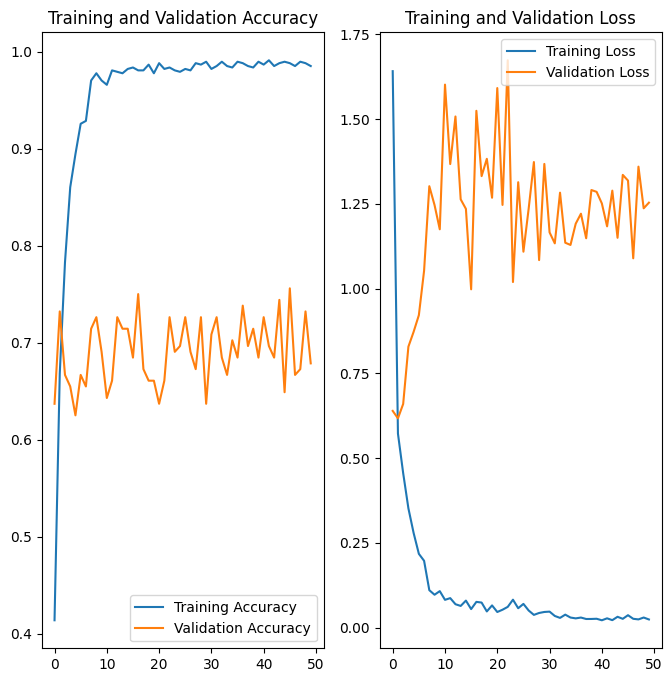

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [27]:
img = cv2.imread(os.path.join('test', 'testing_set', 'julia_0.png'))
resize = tf.image.resize(img, (256, 256)) 

img_array = tf.keras.utils.img_to_array(resize)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 21ms/step
This image most likely belongs to julia_set with a 98.91 percent confidence.


### Functions

#### The following functions will be used in the workflow.

To define the Mandelbrot Fractal shape:

In [ ]:
def mandelbrot_image(width, height, max_iter, x_center=0.0, y_center=0.0, x_width=3.5, y_width=2.0):
    pixel_array = np.zeros((width, height))
    for x in range(width):
        for y in range(height):
            zx, zy = x_center + x * (x_width / width) - x_width/2, y_center + y * (y_width / height) - y_width/2
            c = zx + zy * 1j
            z = c
            for i in range(max_iter):
                if abs(z) > 2.0:
                    break 
                z = z * z + c
            pixel_array[y, x] = i
    return pixel_array

* This function would generate the **Mandelbrot set** of fractal shapes and save them as images in the appropriate folder:

In [ ]:
# Ensure the directory exists
output_dir = 'data/mandelbrot_set'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

#It takes about 5 minutes to generate 10 images using this code
for i in range(100):
    image = mandelbrot_image(800, 800, 1000, x_center=np.random.uniform(-0.7, 0.7), y_center=np.random.uniform(-0.7, 0.7))
    plt.imsave(os.path.join(output_dir, f'mandelbrot_{i}.png'), image, cmap='twilight_shifted')

To define Julia Fractal shape:

In [ ]:
def julia_image(width, height, max_iter, cx, cy):
    pixel_array = np.zeros((width, height))
    for x in range(width):
        for y in range(height):
            zx, zy = x * (3.5 / width) - 2.5, y * (2.0 / height) - 1.0
            c = complex(cx, cy)
            z = complex(zx, zy)
            for i in range(max_iter):
                if abs(z) > 2.0:
                    break 
                z = z * z + c
            pixel_array[y, x] = i
    return pixel_array

* This function would generate the **Julia set** of fractal shapes and save them as images in the appropriate folder:

In [ ]:
# Ensure the directory exists
output_dir = 'data/julia_set'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

#It takes about 5 minutes to generate 10 images using this code
for i in range(100):
    cx, cy = np.random.uniform(-0.8, 0.8), np.random.uniform(-0.8, 0.8)
    image = julia_image(800, 800, 1000, cx, cy)
    plt.imsave(os.path.join(output_dir, f'julia_{i}.png'), image, cmap='twilight_shifted')

To define Koch Snowflake Fractal shape:

In [ ]:
def koch_snowflake(iterations):
    def koch_snowflake_recursion(p1, p2, iterations):
        if iterations == 0:
            xs = [p1[0], p2[0]]
            ys = [p1[1], p2[1]]
            return xs, ys

        # Calculate third points
        dx = p2[0] - p1[0]
        dy = p2[1] - p1[1]
        a = (p1[0] + dx / 3, p1[1] + dy / 3)
        c = (p1[0] + 2 * dx / 3, p1[1] + 2 * dy / 3)
        b = (p1[0] + 0.5 * dx - np.sqrt(3) * 0.5 * dy / 3, 
             p1[1] + 0.5 * dy + np.sqrt(3) * 0.5 * dx / 3)

        xs1, ys1 = koch_snowflake_recursion(p1, a, iterations-1)
        xs2, ys2 = koch_snowflake_recursion(a, b, iterations-1)
        xs3, ys3 = koch_snowflake_recursion(b, c, iterations-1)
        xs4, ys4 = koch_snowflake_recursion(c, p2, iterations-1)

        return xs1 + xs2 + xs3 + xs4, ys1 + ys2 + ys3 + ys4

    # Initialize triangle
    p1 = (0, 0)
    p2 = (0.5, np.sqrt(3) / 2)
    p3 = (1, 0)

    xs1, ys1 = koch_snowflake_recursion(p1, p2, iterations)
    xs2, ys2 = koch_snowflake_recursion(p2, p3, iterations)
    xs3, ys3 = koch_snowflake_recursion(p3, p1, iterations)

    xs = xs1 + xs2 + xs3
    ys = ys1 + ys2 + ys3

    return xs, ys

* This function would generate the **Koch Snowflake set** of fractal shapes and save them as images in the appropriate folder:

In [ ]:
# Ensure the directory exists
output_dir = 'data/koch_snowflake_set'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

def save_koch_snowflake(iterations, i, output_dir):
    xs, ys = koch_snowflake(iterations)
    plt.figure(figsize=(8, 8))
    plt.fill(xs, ys, facecolor='cyan', edgecolor='blue')
    plt.axis('equal')
    # Save the figure to the specified directory
    plt.savefig(os.path.join(output_dir, f'koch_snowflake_{i}.png'))
    plt.close()

# Generate and save 10 Koch snowflake images
for i in range(100):
    save_koch_snowflake(4 + i % 3, i, output_dir)

^ This function would generate the **Koch Snowflake set** of fractal shapes and save them as images in the same directory.

### 1. Data Preparation

* Use the previously defined functions to generate i number of fractals (i = 10 was chosen in this case due to relatively long fractal image generation time).

* The generated images should be in **data/[fractal set name]** check with the following code:

In [ ]:
os.listdir('data')

* Sample each dataset by running the code below:

In [ ]:
mandelbrot_sample = cv2.imread(os.path.join('data', 'mandelbrot_set', 'mandelbrot_0.png'))
julia_sample = cv2.imread(os.path.join('data', 'julia_set', 'julia_0.png'))
koch_snowflake_sample = cv2.imread(os.path.join('data', 'koch_snowflake_set', 'koch_snowflake_0.png'))

plt.figure(figsize = (10,50))
plt.subplot(1,3,1) 
plt.imshow(mandelbrot_sample)
plt.title('Mandelbrot Set Sample')
plt.subplot(1,3,2)
plt.imshow(julia_sample)
plt.title('Julia Set Sample')
plt.subplot(1,3,3)
plt.imshow(koch_snowflake_sample)
plt.title('Koch Snowflake Set Sample')
plt.show()


* Sort and insure the images belong to separate classification, for my run:

    0 = Julia Set, 1 = Koch Snowflake, 2 = Mandelbrot Set

* Run the code multiple times to randomly display different fractals:

In [ ]:
# Reference from YouTube video titles "Build a Deep CNN Image Classifier with ANY Images" by Nicholas Renotte
data = tf.keras.utils.image_dataset_from_directory('data')
data_iterator = data.as_numpy_iterator()
batch = next(data_iterator)                                      # Get the first batch
batch[1]                                                         # Get the labels
fig, ax = plt.subplots(1, 5, figsize=(20, 20))                   # Plot the first 5 images to visually inspect the data
for i in range(5):
    ax[i].imshow(batch[0][i].astype('uint8'))
    ax[i].title.set_text(f'Label: {batch[1][i]}')

### 2. Data Augmentation and Preprocessing

* Scale the data to increase the efficinecy of the run time (only run once to avoid values going to 0):

In [ ]:
data = data.map(lambda x, y: (x/255.0, y))                        # Normalize the data

* Check that the scaling is done correctly:

In [ ]:
scaled_iterator = data.as_numpy_iterator()                         # Check the first pixel value
batch = scaled_iterator.next()                                     # Get the first batch
fig, ax = plt.subplots(1, 5, figsize=(20, 20))                     # Plot the first 5 images to visually inspect the data
for i in range(5):
    ax[i].imshow(batch[0][i])
    ax[i].title.set_text(f'Label: {batch[1][i]}')

* Split the data:

In [ ]:
train_size = int(len(data) * 0.7)                                    # Set the split size between train, validation, and test
val_size = int(len(data) * 0.2)
test_size = int(len(data) * 0.1)

train = data.take(train_size)                                        # Split the data
val = data.skip(train_size + test_size).take(val_size)
test = data.skip(train_size).take(test_size)


len(train), len(val), len(test),                                     # Check the length of each split

### 3. Define the CNN model

* Use **'tensorflow.keras'** to define the CNN model:


In [ ]:
model = Sequential()                                                  # Initiate the model

* Adding a the nueral network layers:

In [ ]:
# Add the first convolutional and pooling layers
model.add(Conv2D(16, (3, 3), 1, activation='relu', input_shape=(256, 256, 3))) 
model.add(MaxPooling2D())                                                      

# Add the second convolutional and pooling layers
model.add(Conv2D(32, (3, 3), 1, activation='relu', input_shape=(256, 256, 3))) 
model.add(MaxPooling2D())                                                      

# Add the third convolutional and pooling layers
model.add(Conv2D(16, (3, 3), 1, activation='relu', input_shape=(256, 256, 3))) 
model.add(MaxPooling2D())                                                      

# Flatten the data
model.add(Flatten())                                                           

# Add dense & output layer
model.add(Dense(256, activation='relu'))                                       
model.add(Dense(1, activation='sigmoid'))                                      

### 4. Compile and train the model

* Compile the model then use the generated images to train and test the model:


In [ ]:
model.compile(optimizer='adam', loss=tf.losses.BinaryCrossentropy() ,metrics=['accuracy'])
model.summary()                 # Check the model summary              

* Create the necessary log and train the model:

In [ ]:
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)
hist = model.fit(train, validation_data=val, epochs=100, callbacks=[tensorboard_callback]) # Train the model

* Plot the accuracy and loss data to visualize the model performance:

In [ ]:
plt.figure(figsize=(20, 5)) # Plot the loss and accuracy
plt.subplot(1, 2, 1)
plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label='val_loss')
plt.title('Loss', fontsize=20)
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.subplot(1, 2, 2)
plt.plot(hist.history['accuracy'], label='accuracy', color='red')
plt.plot(hist.history['val_accuracy'], label='val_accuracy', color='green')
plt.title('Accuracy', fontsize=20)
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Val')
plt.ylim(0, 1)
plt.show()



### 5. Evaluate

* Instantiate the precsion, recall and binary accuracy:


In [ ]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()  

* Evaluate the accuracy of the model


In [ ]:
for batch in test:
    images, labels = batch
    predictions = model.predict(images)
    pre.update_state(labels, predictions)
    re.update_state(labels, predictions)
    acc.update_state(labels, predictions)
    print(f'Precision:        {pre.result().numpy()}')
    print(f'Recall:           {re.result().numpy()}')
    print(f'Accuracy:         {acc.result().numpy()}')

* Create the testing set:

In [ ]:
# Ensure the directory exists
output_dir = 'data/testing_set'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

for i in range(2):
    image = mandelbrot_image(800, 800, 1000, x_center=np.random.uniform(-0.7, 0.7), y_center=np.random.uniform(-0.7, 0.7))
    plt.imsave(os.path.join(output_dir, f'mandelbrot_{i}.png'), image, cmap='twilight_shifted')

for i in range(2):
    cx, cy = np.random.uniform(-0.8, 0.8), np.random.uniform(-0.8, 0.8)
    image = julia_image(800, 800, 1000, cx, cy)
    plt.imsave(os.path.join(output_dir, f'julia_{i}.png'), image, cmap='twilight_shifted')

def save_koch_snowflake(iterations, i, output_dir):
    xs, ys = koch_snowflake(iterations)
    plt.figure(figsize=(8, 8))
    plt.fill(xs, ys, facecolor='cyan', edgecolor='blue')
    plt.axis('equal')
    # Save the figure to the specified directory
    plt.savefig(os.path.join(output_dir, f'koch_snowflake_{i}.png'))
    plt.close()

# Generate and save 10 Koch snowflake images
for i in range(2):
    save_koch_snowflake(4 + i % 3, i, output_dir)

* Resize the generated testing set to the the specifications of our model:

In [ ]:
img = cv2.imread(os.path.join('data', 'testing_set', 'mandelbrot_0.png'))
plt.imshow(img)

In [ ]:
resize = tf.image.resize(img, (256, 256)) 



### Results

#### Fractal sets sample:

The code generated 10 of each fractal set and below is a sample of one from each set (shown sample was chosen based on clarity and not random):

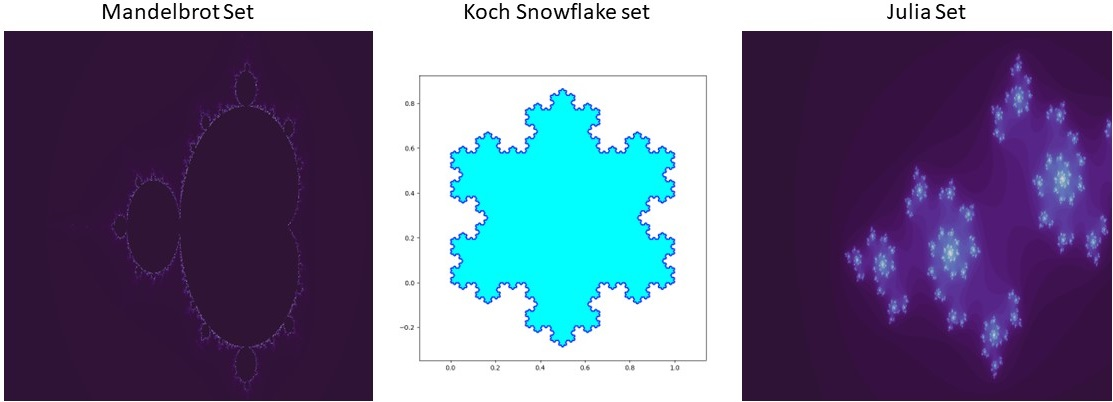

#### Model Summary:

After running the model, the following message was generated evaluating the accurace of the model:

1/1 [==============================] - 0s 358ms/step - loss: 1.0304 - accuracy: 0.3333
Validation accuracy: 33.33%

* Based on those results, the model seem to be as accurate as random guess at (1/3) chance of correctness. The following are further areas of exploration on how to improve:
1. Use of a more robust image processing neural network function.
2. Generation of higher number of training set 100s, 1,000s or maybe 1,000,000s images might be required for such simple code.
3. Building a more easily recognizable shape (Triangle vs Circle) and gradually increase the complexity of shapes.

### Parting Comments / Promote You

* First time trying machine learning, almost all of the project was possible thanks to Dr. Pyrcz's class.
* GitHub copilot was utilized throughout the project which might cause some similarites with other existing GitHub codess.